In [ ]:
!pip install langchain
!pip install openai
!pip install PyPDF2
!pip install faiss-cpu
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from PyPDF2 import PdfReader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import ElasticVectorSearch, Pinecone, Weaviate, FAISS
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
# Get your API keys from openai, you will need to create an account.
# Here is the link to get the keys: https://platform.openai.com/account/billing/overview
import os
os.environ["OPENAI_API_KEY"] = "your open api key"

In [ ]:
# connect your Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [ ]:
# location of the pdf file/files.
reader = PdfReader('/content/gdrive/My Drive/data/SDR-JobDescriptionBNM.pdf')

In [ ]:
reader

In [ ]:
# read data from the file and put them into a variable called raw_text
raw_text = ''
for i, page in enumerate(reader.pages):
    text = page.extract_text()
    if text:
        raw_text += text

In [ ]:
# raw_text

In [ ]:
raw_text[:100]

'  \n  \n  \n  \n  \nSales Development Representative - Intern                      Location: Bangalore /N'

In [ ]:
# We need to split the text that we read into smaller chunks so that during information retreival we don't hit the token size limits.

text_splitter = CharacterTextSplitter(
    separator = "\n",
    chunk_size = 1000,
    chunk_overlap  = 200,
    length_function = len,
)
texts = text_splitter.split_text(raw_text)

In [ ]:
len(texts)

5

In [ ]:
texts[0]

'Sales Development Representative - Intern                      Location: Bangalore /Noida/Mumbai   \n  \n  \nAbout LeadSquared:  \n  \nLeadSquared  is a Sales Automation SaaS platform, helping 2000+ organizations globally to drive sales \nefficiency at scale. LeadSquared has built a global, best -in-class CRM platform that takes away the \nguesswork from sales execution and makes efficiency the focus of e very customer interaction, no \nmatter how complex the customer journey.   \nThe software captures leads from all your channels automatically, manages them intelligently, and \ntransfers them to the right teams (and people), ensuring zero lead leakage and zero m issed \nopportunities.  \n  \nWe are backed by prominent investors such as Stakeboat Capital and Gaja Capital to name a few. In \nour latest round of Series C Funding from WestBridge Capital, we secured $153mn, making us India’s'

In [ ]:
texts[1]

"We are backed by prominent investors such as Stakeboat Capital and Gaja Capital to name a few. In \nour latest round of Series C Funding from WestBridge Capital, we secured $153mn, making us India’s \n103rd Unicorn!  We are expanding rap idly and our 1400+ strong and still growing workforce is spread \nacross India, the U.S, the Middle East, ASEAN, ANZ, and South Africa.   \n  \n• LeadSquared is a six -time Deloitte Fast 50 company.   \n• We have won the National Start -up Award 2021 and got recognized by DPIIT, under the \nEnterprise Software Category  \n• In the last few years, we have been recognized multiple times by G2 as a High Performer in \nthe Enterprise category.   \n• We have been included in  the prestigious Economic Times’ India’s Growth Champions list \nand among Top 100 fastest growing companies in FT 1000: High -Growth Companies Asia -\nPacific   \n• Frost and Sullivan's 2019 Marketing Automation Company of the Year award. •  Listed as"

In [ ]:
texts[2]

"and among Top 100 fastest growing companies in FT 1000: High -Growth Companies Asia -\nPacific   \n• Frost and Sullivan's 2019 Marketing Automation Company of the Year award. •  Listed as \nTop Rates Pro duct on G2Crowd, GetApp, and TrustRadius   \n  \nSales @ LeadSquared   \nAt LeadSquared, we love fearless Sales Rainmakers. “Hustle, Work, Repeat”  is something we live by \nin sales. Your success is directly proportional to the responsibility you hold. If you are curious to \nlearn about the business, thrive to be better every single day, have a scaling attitude in your DNA, \nhave the zeal to drive your team to success and love enjoying the exciting perks that come along, we \nlook forward to onboarding you. What better  way to earn?!  \n  \n  \n  \n  \n  \n \n   \nWebsite  | Careers Page   \n  \n  \n  \n  \nThe Role  \nAs the face of LeadSquared, the ideal candidate for this role is one who is fearless and ad venturous"

In [ ]:
# Download embeddings from OpenAI
embeddings = OpenAIEmbeddings()

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [ ]:
docsearch = FAISS.from_texts(texts, embeddings)

In [ ]:
docsearch

In [ ]:
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI

In [ ]:
chain = load_qa_chain(OpenAI(), chain_type="stuff")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(


In [ ]:
query = "In which parts of the world is LeadSquare's workforce spread across"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


' India, the U.S, the Middle East, ASEAN, ANZ, and South Africa.'

In [ ]:
query = "Explain 'The Role' at LeadSquared"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

' The role at LeadSquared is for a Sales Development Representative - Intern. The ideal candidate is someone who is fearless, adventurous, and not afraid of a fast-paced environment. They should have strong communication skills and a proven creative problem-solving approach. The role involves proactive and creative prospecting, building relationships with customers, developing business acumen, and opportunities for growth and excellence within the company. LeadSquared is a highly successful and rapidly expanding company, recognized for its growth and achievements in the industry.'

In [ ]:
query = "What will daily adventures at LeadSquared include?"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

' Proactive and creative prospecting, building long-lasting relationships with customers, developing business acumen, and opportunities for growth and excellence within the company.'

In [ ]:
# Reference text for each query
reference_texts = [
    "India, the U.S, the Middle East, ASEAN, ANZ, and South Africa.",
    "The daily adventures will include proactive and creative prospecting, building long-lasting relationships with customers across industries, developing business acumen, and opportunities for growth and excellence with the company."

]

# Generated text for each query
generated_texts = [

    "India, the U.S, the Middle East, ASEAN, ANZ, and South Africa.",
    "Proactive and creative prospecting, building long-lasting relationships with customers across industries, developing business acumen, and opportunities for growth and excellence with the company."
]

# List to store individual BLEU scores
bleu_scores = []

# Calculate BLEU score for each query
for reference_text, generated_text in zip(reference_texts, generated_texts):
    bleu_score = sentence_bleu([reference_text.split()], generated_text.split())
    bleu_scores.append(bleu_score)
    print(f"BLEU Score: {bleu_score}")

BLEU Score: 1.0
BLEU Score: 0.7670869551752849


In [ ]:
# Calculate average BLEU score
average_bleu_score = sum(bleu_scores) / len(bleu_scores)
print(f"\nAverage BLEU Score: {average_bleu_score}")



Average BLEU Score: 0.8835434775876425


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# BLEU scores for the first set of queries (OpenAI)
bleu_values_openai = [1, 0.2, 1, 1, 1, 0.5]

# BLEU scores for the second set of queries (Hugging Face)
bleu_values_hugging_face = [0.8, 0.3, 1, 0.5, 0.7, 1]

# BLEU scores for the third set of queries (Bloom)
bleu_values_bloom = [0.9, 0.5, 0.7, 1, 0.4, 0.8]

# Query numbers
queries = list(range(1, len(bleu_values_openai) + 1))

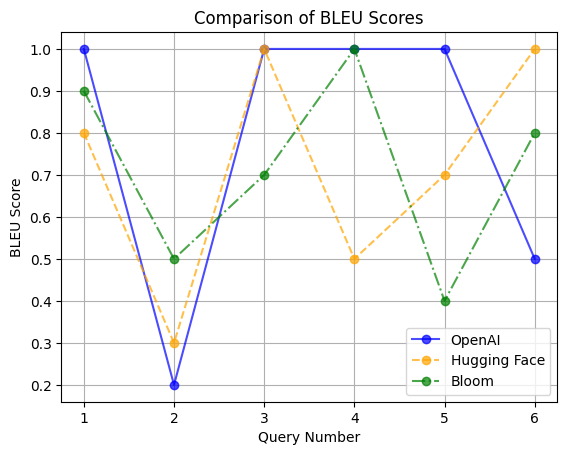

In [ ]:
# Create the line graph with adjusted styles
plt.plot(queries, bleu_values_openai, label='OpenAI', color='blue', linestyle='-', alpha=0.7, marker='o', markersize=6)
plt.plot(queries, bleu_values_hugging_face, label='Hugging Face', color='orange', linestyle='--', alpha=0.7, marker='o', markersize=6)
plt.plot(queries, bleu_values_bloom, label='Bloom', color='green', linestyle='-.', alpha=0.7, marker='o', markersize=6)

# Add labels and title
plt.xlabel('Query Number')
plt.ylabel('BLEU Score')
plt.title('Comparison of BLEU Scores')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()